# DCA Removal Module Testing

This notebook is used to check that the dca_removal.py module is working as intended for both inpainting methods.

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../../Modules' not in sys.path:
    sys.path.insert(0, '../../Modules')

import pandas as pd
import numpy as np
from PIL import Image
import os, os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import Bunch
import cv2
import image_modifications as im # custom image modification module
import isic_data as isic
import dca_removal

------

## Data loading

In [2]:
# Load in the image datasets
X = isic.get_data(type = 'none')

lesions_train = X[0]
lesions_test = X[1]

In [3]:
target_filepaths = [r'../../Data/train_balanced_224x224_inpainted/train/mel',
                    r'../../Data/train_balanced_224x224_inpainted/train/oth',
                    r'../../Data/train_balanced_224x224_inpainted/val/mel',
                    r'../../Data/train_balanced_224x224_inpainted/val/oth']

In [4]:
t_mel_csv = pd.read_csv(r"../../Data/Annotations/train_mel.csv")
dca_t_mel_csv = pd.read_csv(r"../../Data/Annotations/dca_intensities_train_mel.csv")
# Segregate each mask type and retain the old index
small_dca_masks = dca_t_mel_csv.loc[dca_t_mel_csv['Small_DCA'] == 1].reset_index(drop = False)
medium_dca_masks = dca_t_mel_csv.loc[dca_t_mel_csv['Medium_DCA'] == 1].reset_index(drop = False)
large_dca_masks = dca_t_mel_csv.loc[dca_t_mel_csv['Large_DCA'] == 1].reset_index(drop = False)
oth_dca_masks = dca_t_mel_csv.loc[dca_t_mel_csv['Oth'] == 1].reset_index(drop = False)

small_dca_masks['Original_Image_Name'] = [small_dca_masks['Image_Name'][i][:-9] + '.jpg' for i in range(len(small_dca_masks.index))]
medium_dca_masks['Original_Image_Name'] = [medium_dca_masks['Image_Name'][i][:-9] + '.jpg' for i in range(len(medium_dca_masks.index))]
large_dca_masks['Original_Image_Name'] = [large_dca_masks['Image_Name'][i][:-9] + '.jpg' for i in range(len(large_dca_masks.index))]
oth_dca_masks['Original_Image_Name'] = [oth_dca_masks['Image_Name'][i][:-9] + '.jpg' for i in range(len(oth_dca_masks.index))]




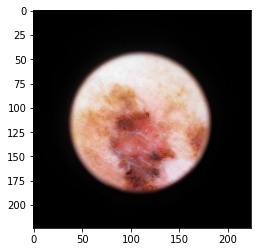

In [35]:
IMAGE_NUMBER = 0
DCA_SET = large_dca_masks

test_image_name = DCA_SET['Original_Image_Name'][IMAGE_NUMBER]
test_image = np.asarray(Image.open(os.path.join(r'../../Data/train_balanced_224x224/train/mel/', test_image_name)))
test_image_mask_name = DCA_SET['Image_Name'][IMAGE_NUMBER]
test_image_mask = np.asarray(Image.open(os.path.join(r'../../Data/DCA_Masks/train/mel/', test_image_mask_name)))

plt.imshow(test_image)

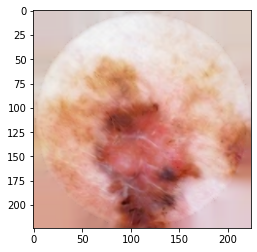

In [36]:
inpainted_image = dca_removal.remove_DCA(test_image, test_image_mask)

plt.imshow(inpainted_image)

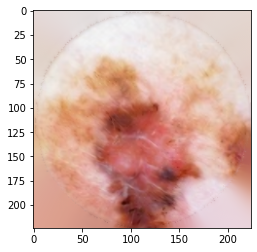

In [37]:
inpainted_image_telea = dca_removal.remove_DCA(test_image, test_image_mask, 'inpaint_telea')
plt.imshow(inpainted_image_telea)